<span style="font-size:x-large;">Lab 4: Mini-Assignment</span>

# Census Lab Assignment

### Declaration

This declaration should be completed and remain attached to the bottom of your submission.

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Ruida He

Date: 31 Aug 2020

---

## Task

Investigate a question of your choosing about a population from the 2016 Census data provided by the Australian Bureau of Statistics (ABS), and present your findings, as discussed in the accompanying assignment sheet.

---

# Census Research about Weekly Income of Different Family Composition

<span style="font-size:x-large; text-align=centre"> Written by Ruida He (22762872) </span> 





## Aim

The aim of this assignment is going to find out :

> Is it possible to be in earning a higher weekly income when also part of a 'non-traditional' family composition? How likely is that?

Before we start our research, we need to clarify some terms in data source.

* Traditional family : couple family with children

* Non-traditional family : a family that is not made up of one mother, one father, and a child or children (Reference : https://www.merriam-webster.com/dictionary/nontraditional%20family#:~:text=%3A%20a%20family%20that%20is%20not,and%20a%20child%20or%20children), it includes :

    - couple families with not children

    - one parent families

    - other kinds of families

The libraries that helps me organise my data and visualise my result are *`matplotlib.pyplot`* and *`pandas`*.

## Data Acquisition

My data source is obtained from the 2016 Census General Community Profile datapack in the ABS.  ( Download from : https://datapacks.censusdata.abs.gov.au/datapacks/ )

The data source I'm using is " 2016Census_G28_AUS.csv " that describes Total Family Income (Weekly) by Different Family Composition.

* The csv file has been uploaded to the same directory with censusAssignment, you can check it at this directory.

If you would like to find the same source file yourself, you can just open the Metadata spreadsheet (in your preferred spreadsheet software) after downloading the datapack, and find the table (G28) that reports family income data from the Census.



## Data Cleaning & Conversion

###### Please execute it firstly before you go through the rest of my research.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Cleaning Steps

The steps that I "clean" my data and make a proper "conversion":

* Read the file and store the headings and corresponding numbers in the separate lists ----> headings and numbers

* Use a loop to read the headings and numbers

    - Remove all the "Total" columns since we are not interested in it

    - Convert "Negative income" to "below_0" for better readability

    - Convert three type of partial income ("Prt_inc_std", "Part_inc_stated", and "Partial_income") to "Partial income"

    - Convert "All_income_not_stated" to "Not_stated"

    - Since all type of income range are changed to "xxx_xxx_....", we can get the income ranges by splitting the each headings string with the second underscore and then converting back to the string. We can get the x_labels (income ranges) in this way.

* And then I just found out I don't need "partial_stated" and "Not_stated", so I just remove them.

* Finally, put them all in one function called Pre_processing().


>Note: The reason why I didn't just ignore "partial_stated" and "Not_stated" data in the for loop (for better Simplicity of code) is because I want to show how I extracted the data source and then decided which part of them can be helpful for my research.


In [2]:
# This function will return duplciated x labels (income range) and income numbers.
# We will keep cleaning the data later on.
def Pre_processing(DATA):

    with open(DATA, "r") as file:
        headings   = file.readline().split(",")[1:]              # Strip out the AUS code
        numbers    = file.readline().split(",")[1:]


    family_cats     = []
    numbers_income  = []
    x_labels        = []

    for i in range(len(headings)):

        currentHeading = headings[i]

        if "Tot" not in currentHeading:                         # Strip out "Total" entries

            if "FI_" in currentHeading:
                currentHeading = currentHeading[3:]
                family_cats.append(currentHeading)              # Srtip out "Fl_"

            elif "_Nil_inc_" in currentHeading:                 # Convert the heading to meaningful one
                currentHeading = currentHeading.replace("Neg_Nil_inc_", "below_0_")
                family_cats.append(currentHeading)

            elif currentHeading[0] == "P":
                # Convert three types of partial income ("Prt_inc_std", "Part_inc_stated", and "Partial_income")
                currentHeading = currentHeading.replace("P", "Partial_stated_")
                family_cats.append(currentHeading)

            elif "All_inc" in currentHeading:
                currentHeading = currentHeading.replace("All_inc", "Not_stated_")
                family_cats.append(currentHeading)

            numbers_income.append(int(numbers[i]))              # Cast to int

            # Store all the x ticks in the a_labels list
            x_labels.append("_".join(currentHeading.split("_", 2)[:2]))


    # Since the partial_stated and not_staed catrgories in't related with our research, remove them
    family_cats      = family_cats[:-8]
    numbers_income   = numbers_income[:-8]
    x_labels         = x_labels[:-8]

    return x_labels, numbers_income



### Examination

Here are some code that I provided for examination, you can try to execute it.

You should get some duplicated income_range and corresponding numbers as below.

```
['below_0', 'below_0', 'below_0', 'below_0', '1_149', '1_149', '1_149', '1_149', '150_299', '150_299']  68

[39820, 13216, 19427, 3279, 18893, 5366, 8836, 1644, 15942, 9225]  68
```

In [3]:
#
DATA = "2016Census_G28_AUS.csv"

income_range, numbers_income = Pre_processing(DATA)

# Take the first 10 elements as example.
print(income_range[:10], len(income_range))
print(numbers_income[:10], len(numbers_income))

['below_0', 'below_0', 'below_0', 'below_0', '1_149', '1_149', '1_149', '1_149', '150_299', '150_299'] 68
[39820, 13216, 19427, 3279, 18893, 5366, 8836, 1644, 15942, 9225] 68


## Data Visualisation - Line Chart

Firstly, I will try to use line chart the see if the result can provide me the answer of my question.


### Steps to make a line chart

* Use a loop to go through 4 types of family

    - Use a slice function to get all income range of each family category.

    - Give them a proper label in the chart

    - Plot the line

* Provide the x labels and organise it (labelRotation)

* Add legends, x_labels, y_labels, and title to the chart

* Put them all in a function called line_chart(), with income_range and x_labels as the parameters.

In [4]:
def line_chart(x_labels, numbers_income):

    # Set the size of the figure
    plt.figure(figsize = (9, 5))

    for i in range(4):

        income = numbers_income[slice(i, len(numbers_income), 4)]

        # Provide the proper labels
        if i == 0:
            lengend_label = "Couple family with no children"
        elif i == 1:
            lengend_label = "Couple family with children"
        elif i == 2:
            lengend_label = "One parent family"
        else:
            lengend_label = "Other family"

        plt.plot(income, label = lengend_label, marker = 'o')

    # Get the x ticks label and organise it
    xtick_labels = x_labels[slice(i, len(x_labels), 4)]
    plt.xticks(ticks = range(len(xtick_labels)), labels = xtick_labels)
    plt.tick_params(axis = "x", labelrotation = 90)

    plt.legend()
    plt.xlabel("Income Range")
    plt.ylabel("Number of Families")
    plt.title("Number of Families Versus Income, 2016 Census")
    plt.show()


### Examination of Line Chart

Here are the code that I provided for examination, please go give it a try!

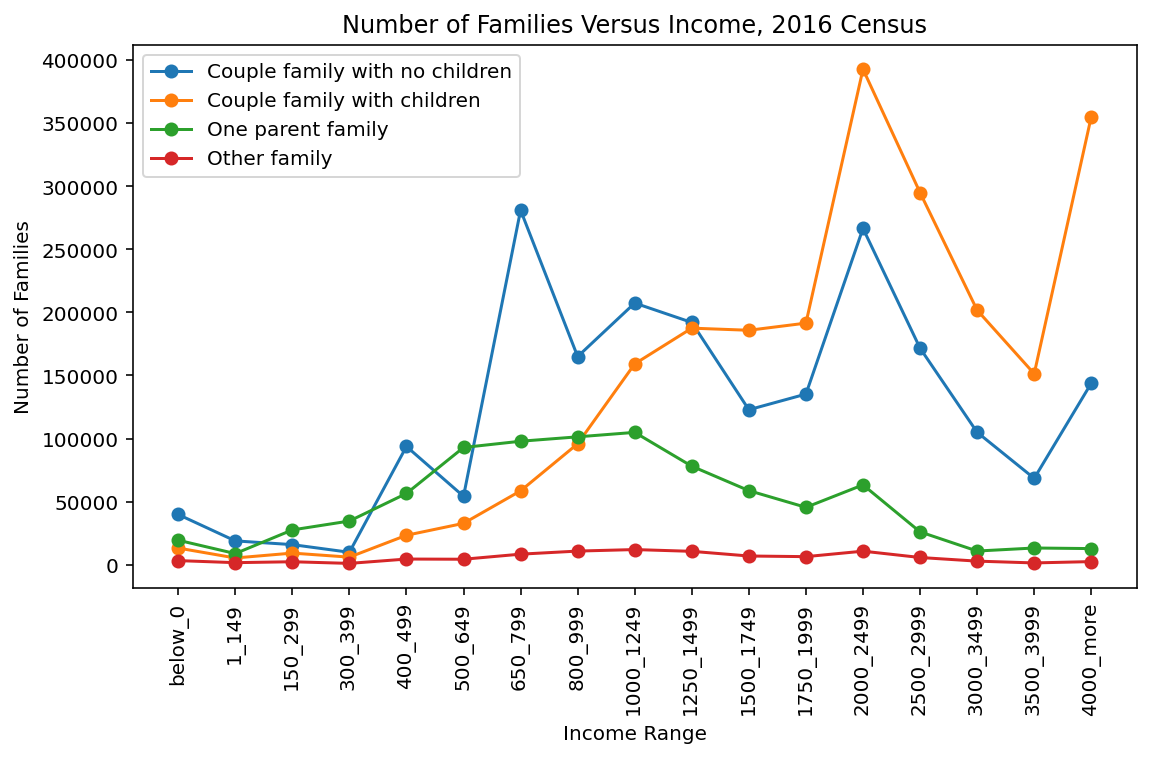

In [5]:
DATA = "2016Census_G28_AUS.csv"

x_labels, numbers_income = Pre_processing(DATA)

line_chart(x_labels, numbers_income)

### Line Chart Analysis

Let's assume family income over the middle of the x ticks (1000 - 1249) is considered as high income.

First of all, it is possible for non-traditional families having higher weekly income as shown in the chart.

When it comes to the likelihood, from income range (1000 - 1249) onwards, it's clear that there are only a few "One parent family" and "Other family" having higher income. With respect to "Couple family with no children", we can see that its trend is similar to that of "Couple family with children", although the amount of the family without children on each high income range are basically all smaller than that of family with children.

However, the line chart is not clear enough to show the likelihood for "Couple family with no children" category. (we have no idea if it is less possible for "Couple family with no children" having higher income.)

So I decide to use another chart (percentage bar chart).

## Data Visuaisation - Percenatge Bar Chart


### Steps to make a percentage bar chart


* Use a loop to make a list containing all incomes, whose element is also a list with all the incomes for all kinds of family.

    > E.g. all_income = [ [all incomes for "Couple family with children"],  [all incomes for "Couple family with no children"], ...] 

* Make the family types list : family_cats     = ["Couple family with no children", "Couple family with children", "One parent family", "Other family"]

* Zip them together to make a dictionary

* Convert them to a dataFrame using pandas library

* Compute the percentage of all family types on each income range.

* Use the data to make the percentage bar chart.

* Add legend, x_labels, y_labels to the chart.

* Put them all in a function called Bar_chart(), with x_labels and numbers_income as the parameter.

In [6]:
# To be more specific with the data we got, we use percent bar plot

def bar_chart(x_labels, numbers_income):

    plt.figure(figsize = (7,4))

    income_ranges   = x_labels[slice(0, len(x_labels), 4)]
    all_income      = []
    family_cats     = ["Couple family with no children", "Couple family with children", "One parent family", "Other family"]
    colors          = ["#E4E3E3", "#84A9AC", "#3B6978", "#204051"]

    for i in range(4):
        all_income.append(numbers_income[slice(i, len(numbers_income), 4)])

    family_income_dict = dict(zip(family_cats, all_income))

    # Construct a dataframe (2D structure) from a dictionary
    df = pd.DataFrame(data = family_income_dict, index = income_ranges)

    # Get the percentage from the value
    for i in df.index:
        df.loc[i] = df.loc[i] * 100 / sum(df.loc[i])

    barwidth = 0.85
    ranges = list(range(len(income_ranges)))

    # The reason I do this is because I want bottom for every bar at first and I can keep adding this way.
    btm = df.iloc[:, 0] - df.iloc[:, 0]

    # Plotting
    for i, j in zip(family_cats, colors):
        plt.bar(ranges, df[i], bottom = btm, color = j, label = i)
        btm += df[i]

    plt.legend(bbox_to_anchor=(1.05, 1), ncol = 1)
    plt.xticks(ticks = ranges, labels = income_ranges)
    plt.tick_params(axis = "x", labelrotation = 90)

    plt.xlabel("Income Range")
    plt.ylabel("Percentage of Families")
    plt.title("Percentage of Families Versus Income, 2016 Census")
    plt.show()



### Examination of bar chart

Here's the code that I provided for examination of bar chart, execute it!

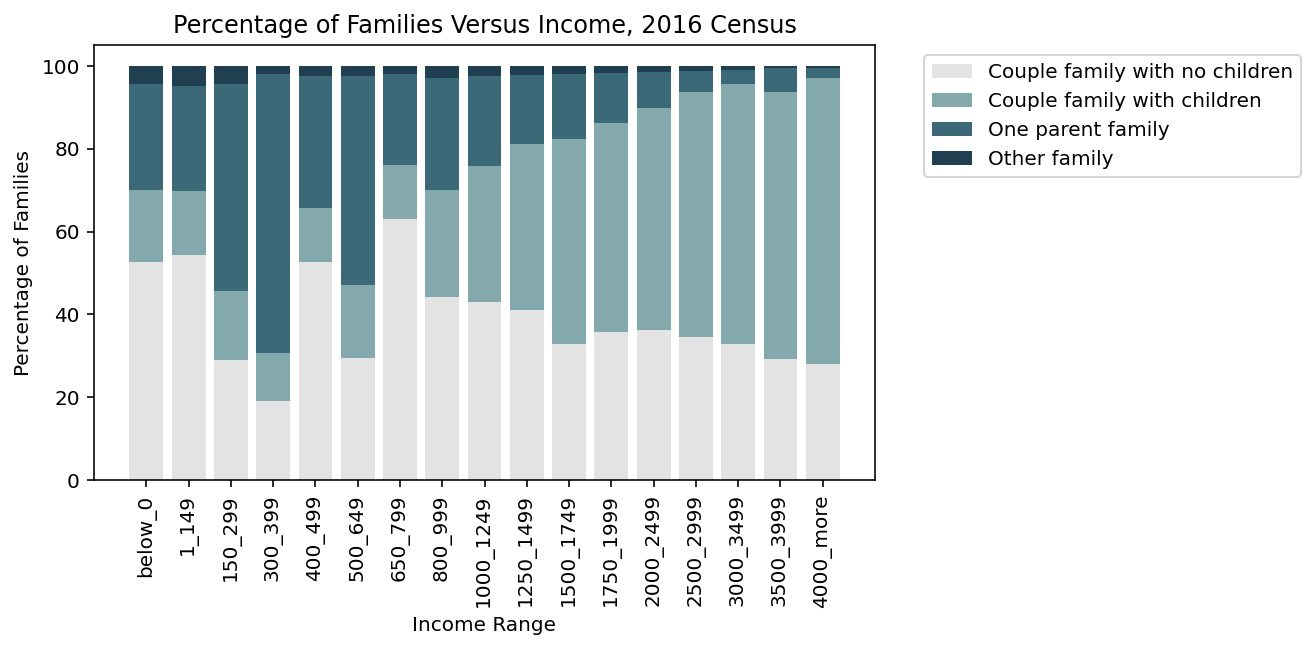

In [7]:
DATA = "2016Census_G28_AUS.csv"

x_labels, numbers_income = Pre_processing(DATA)

bar_chart(x_labels, numbers_income)

## Conclusion

From the percentage bar chart, we can easily see that the proportion of "Couple family with no children", "One parent family" and "Other family" are keeping decreasing with the weekly income range rising.

Therefore, the likelihood of non-traditional families having higher income is decreasing and it is supported by the visualisation of the data source.

That's all of my report, thank you for your patience :)